In [ ]:
##This Lab Report for the 4th lab session. #Classfication:KNN

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_curve, roc_auc_score
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay



In [ ]:
#load dataset

In [2]:
# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)

# Split the data into features and target
X, y = mnist["data"], mnist["target"].astype(np.uint8)


C:\Anaconda\envs\homl3\lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
X.shape

(70000, 784)

In [4]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Preprocess the Data 

In [5]:
# Normalize the pixel values to range [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0


##Training

In [7]:
# Initialize the KNeighborsClassifier
knn_clf = KNeighborsClassifier()

# Train the KNN classifier on the training data
knn_clf.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn_clf.predict(X_test)

# Evaluate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Initial KNN accuracy: {accuracy_knn * 100:.2f}%")



Initial KNN accuracy: 97.01%


In [44]:
#finetuning/hayperprameter

In [8]:
# Define the parameter grid for Grid Search
param_grid = {
    'n_neighbors': [5, 9, 11, 13, 15],
    'weights': ['uniform', 'distance']
}

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, scoring='accuracy')

# Perform the grid search
grid_search.fit(X_train, y_train)

# Best parameters and best score from Grid Search
best_params_knn = grid_search.best_params_
best_score_knn = grid_search.best_score_

print(f"Best Parameters: {best_params_knn}")
print(f"Best Cross-Validation Accuracy: {best_score_knn * 100:.2f}%")



Best Parameters: {'n_neighbors': 5, 'weights': 'distance'}
Best Cross-Validation Accuracy: 97.01%


In [12]:
#Train an evaluate

In [9]:
# Train the KNN classifier using the optimal hyperparameters
knn_best = KNeighborsClassifier(**best_params_knn)
knn_best.fit(X_train, y_train)

# Test the KNN classifier on the test set
y_pred_best_knn = knn_best.predict(X_test)

# Calculate test accuracy
test_accuracy_knn = accuracy_score(y_test, y_pred_best_knn)
print(f"Test Accuracy with Optimized KNN: {test_accuracy_knn * 100:.2f}%")


Test Accuracy with Optimized KNN: 97.20%


In [ ]:
#Result visualization- confusion matrix

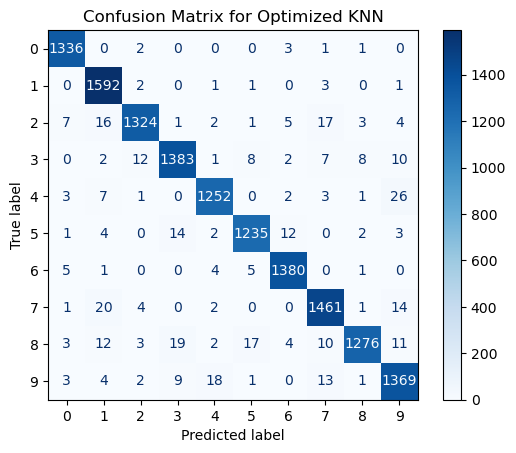

In [11]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_best_knn)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=np.arange(10))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Optimized KNN')
plt.show()


In [ ]:
#learning curves

In [ ]:
#comparsion with other classifier

In [13]:
#Training and evaluating an SGD Classifier for comparison
from sklearn.linear_model import SGDClassifier

# Train the SGD classifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

# Evaluate SGD on the test set
y_pred_sgd = sgd_clf.predict(X_test)
sgd_accuracy = accuracy_score(y_test, y_pred_sgd)
print(f"SGD Classifier Test Accuracy: {sgd_accuracy * 100:.2f}%")




SGD Classifier Test Accuracy: 91.09%


In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier

# Define the parameter grid
param_grid = {
    'alpha': [1e-3, 1e-2],  # Reduced number of values
    'penalty': ['l2', 'elasticnet'],  # Focus on the most useful regularizations
    'max_iter': [1000, 1500],  # Fewer iterations
    'tol': [1e-3],  # A common tolerance value
    'learning_rate': ['optimal', 'adaptive'],  # Fewer learning rate schedules
    'eta0': [0.01],  # A standard initial learning rate
}


# Create the SGD classifier
sgd_clf = SGDClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(sgd_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters and accuracy
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")

# Evaluate the best model on the test set
best_sgd_clf = grid_search.best_estimator_
y_pred_sgd = best_sgd_clf.predict(X_test)
sgd_accuracy = accuracy_score(y_test, y_pred_sgd)
print(f"SGD Classifier Test Accuracy (Tuned): {sgd_accuracy * 100:.2f}%")


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'alpha': 0.001, 'eta0': 0.01, 'learning_rate': 'adaptive', 'max_iter': 1000, 'penalty': 'l2', 'tol': 0.001}
Best Cross-Validation Accuracy: 0.9136
SGD Classifier Test Accuracy (Tuned): 91.60%


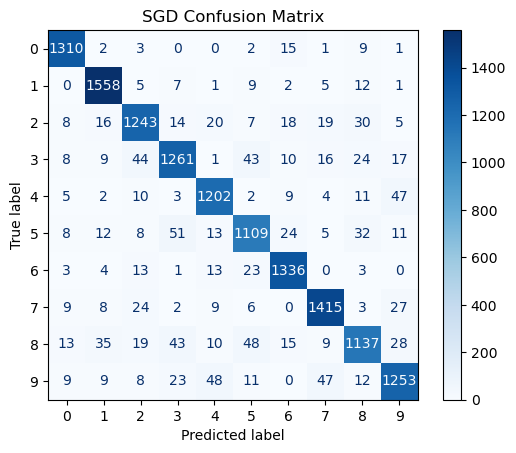

In [15]:
# Confusion Matrix for SGD
conf_matrix_sgd = confusion_matrix(y_test, y_pred_sgd)
ConfusionMatrixDisplay(conf_matrix_sgd, display_labels=np.arange(10)).plot(cmap=plt.cm.Blues)
plt.title('SGD Confusion Matrix')
plt.show()

In [16]:
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

# Evaluate Random Forest on the test set
y_pred_rf = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Classifier Test Accuracy: {rf_accuracy * 100:.2f}%")




Random Forest Classifier Test Accuracy: 96.75%


In [17]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],  # Fewer values for the number of trees
    'max_depth': [10, 20],  # Reduce the maximum depth options
    'min_samples_split': [2, 5],  # Fewer options for minimum samples to split
    'min_samples_leaf': [1, 2],  # Fewer options for minimum samples at a leaf node
    'bootstrap': [True]  # Keep bootstrap as True only
}



# Initialize the Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)

# Perform GridSearchCV with cross-validation (cv=5 for 5-fold)
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Retrieve the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the best model on the test set
best_rf_clf = grid_search.best_estimator_
y_pred_rf = best_rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Classifier Test Accuracy (After Tuning): {rf_accuracy * 100:.2f}%")


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Hyperparameters: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest Classifier Test Accuracy (After Tuning): 96.80%


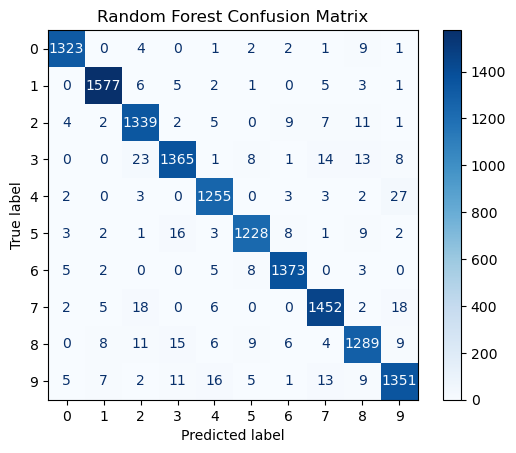

In [18]:
# Confusion Matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(conf_matrix_rf, display_labels=np.arange(10)).plot(cmap=plt.cm.Blues)
plt.title('Random Forest Confusion Matrix')
plt.show()

In [19]:
# Print out the accuracies for easy comparison
print(f"KNN Classifier Test Accuracy: {test_accuracy_knn * 100:.2f}%")
print(f"SGD Classifier Test Accuracy: {sgd_accuracy * 100:.2f}%")
print(f"Random Forest Classifier Test Accuracy: {rf_accuracy * 100:.2f}%")


KNN Classifier Test Accuracy: 97.20%
SGD Classifier Test Accuracy: 91.60%
Random Forest Classifier Test Accuracy: 96.80%


In [ ]:
#plot confusion for all

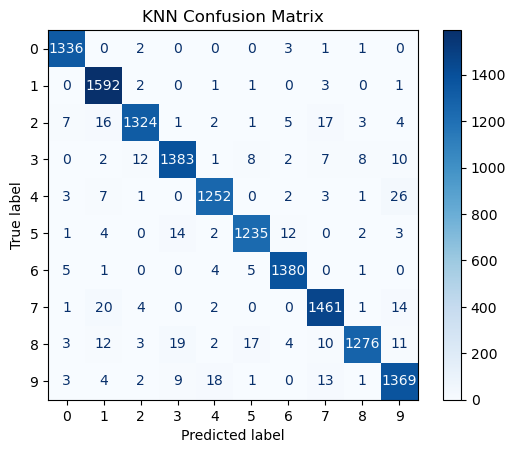

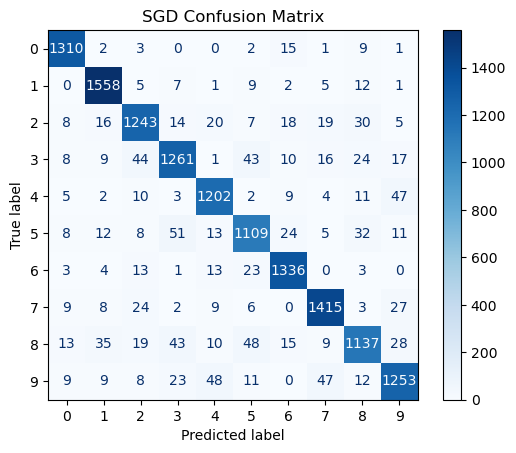

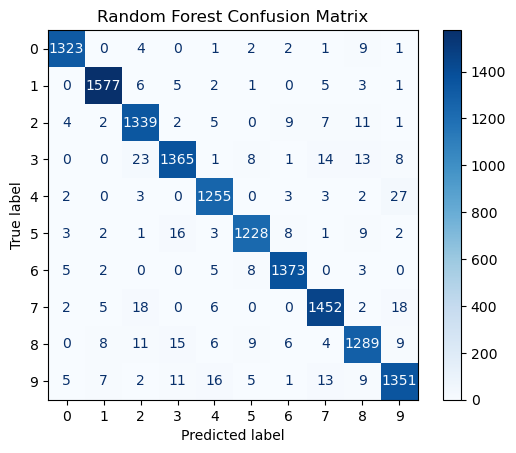

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion matrix for KNN
knn_conf_matrix = confusion_matrix(y_test, y_pred_best_knn)
ConfusionMatrixDisplay(knn_conf_matrix, display_labels=np.arange(10)).plot(cmap=plt.cm.Blues)
plt.title('KNN Confusion Matrix')
plt.show()

# Confusion matrix for SGD
sgd_conf_matrix = confusion_matrix(y_test, y_pred_sgd)
ConfusionMatrixDisplay(sgd_conf_matrix, display_labels=np.arange(10)).plot(cmap=plt.cm.Blues)
plt.title('SGD Confusion Matrix')
plt.show()

# Confusion matrix for Random Forest
rf_conf_matrix = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(rf_conf_matrix, display_labels=np.arange(10)).plot(cmap=plt.cm.Blues)
plt.title('Random Forest Confusion Matrix')
plt.show()


In [21]:
from sklearn.metrics import classification_report

# KNN Report
print("KNN Classifier Report:")
print(classification_report(y_test, y_pred_best_knn))

# SGD Report
print("SGD Classifier Report:")
print(classification_report(y_test, y_pred_sgd))

# Random Forest Report
print("Random Forest Classifier Report:")
print(classification_report(y_test, y_pred_rf))


KNN Classifier Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1343
           1       0.96      0.99      0.98      1600
           2       0.98      0.96      0.97      1380
           3       0.97      0.97      0.97      1433
           4       0.98      0.97      0.97      1295
           5       0.97      0.97      0.97      1273
           6       0.98      0.99      0.98      1396
           7       0.96      0.97      0.97      1503
           8       0.99      0.94      0.96      1357
           9       0.95      0.96      0.96      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000

SGD Classifier Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1343
           1       0.94      0.97      0.96      1600
           2       0.90      0.9

In [ ]:
#plot confusion matrix for all 

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.exceptions import NotFittedError

# Fit the models first (if not already done)

# For SGD Classifier
sgd_clf.fit(X_train, y_train)

# For KNN Classifier
knn_clf.fit(X_train, y_train)

# For Random Forest Classifier (assuming best_rf_clf is from GridSearchCV)
best_rf_clf.fit(X_train, y_train)

# Predict and calculate classification metrics
# For KNN
y_pred_knn = knn_clf.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred_best_knn)
knn_precision = precision_score(y_test, y_pred_knn, average='macro')
knn_recall = recall_score(y_test, y_pred_knn, average='macro')
knn_f1 = f1_score(y_test, y_pred_knn, average='macro')

# For SGD
y_pred_sgd = sgd_clf.predict(X_test)
sgd_accuracy = accuracy_score(y_test, y_pred_sgd)
sgd_precision = precision_score(y_test, y_pred_sgd, average='macro')
sgd_recall = recall_score(y_test, y_pred_sgd, average='macro')
sgd_f1 = f1_score(y_test, y_pred_sgd, average='macro')

# For Random Forest
y_pred_rf = best_rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf, average='macro')
rf_recall = recall_score(y_test, y_pred_rf, average='macro')
rf_f1 = f1_score(y_test, y_pred_rf, average='macro')

# Binarize the test labels for ROC AUC calculation
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)

# Calculate ROC AUC for each model
# For KNN
y_score_knn = knn_clf.predict_proba(X_test)  # KNN uses predict_proba
knn_roc_auc = roc_auc_score(y_test_bin, y_score_knn, average='macro', multi_class='ovr')

# For SGD (after fitting)
y_score_sgd = sgd_clf.decision_function(X_test)  # SGD uses decision_function
sgd_roc_auc = roc_auc_score(y_test_bin, y_score_sgd, average='macro', multi_class='ovr')

# For Random Forest
y_score_rf = best_rf_clf.predict_proba(X_test)  # Random Forest uses predict_proba
rf_roc_auc = roc_auc_score(y_test_bin, y_score_rf, average='macro', multi_class='ovr')

# Print out ROC AUC scores
print(f"KNN ROC AUC: {knn_roc_auc}")
print(f"SGD ROC AUC: {sgd_roc_auc}")
print(f"Random Forest ROC AUC: {rf_roc_auc}")


KNN ROC AUC: 0.9953758174197821
SGD ROC AUC: 0.9829304630736304
Random Forest ROC AUC: 0.9990189814044704


In [25]:
import pandas as pd

# Create a DataFrame to store all metrics
comparison_df = pd.DataFrame({
    'Classifier': ['KNN', 'SGD', 'Random Forest'],
    'Accuracy': [knn_accuracy, sgd_accuracy, rf_accuracy],
    'Precision': [knn_precision, sgd_precision, rf_precision],
    'Recall': [knn_recall, sgd_recall, rf_recall],
    'F1-Score': [knn_f1, sgd_f1, rf_f1],
    'ROC AUC': [knn_roc_auc, sgd_roc_auc, rf_roc_auc]
})

# Display the comparison table
print(comparison_df)


      Classifier  Accuracy  Precision    Recall  F1-Score   ROC AUC
0            KNN  0.970071   0.970655  0.969671  0.970028  0.995376
1            SGD  0.910929   0.910376  0.908994  0.908961  0.982930
2  Random Forest  0.968000   0.967857  0.967822  0.967822  0.999019


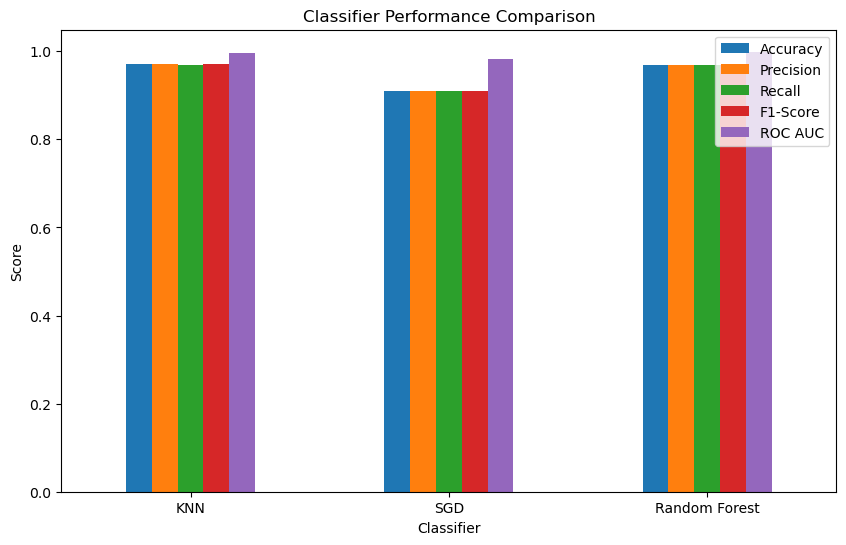

In [26]:
comparison_df.set_index('Classifier').plot(kind='bar', figsize=(10, 6))
plt.title('Classifier Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.show()


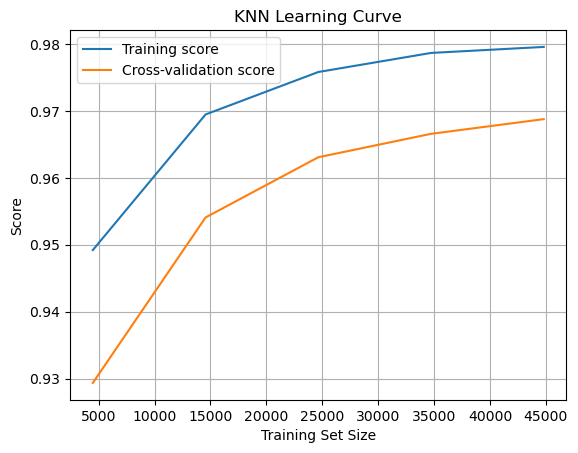

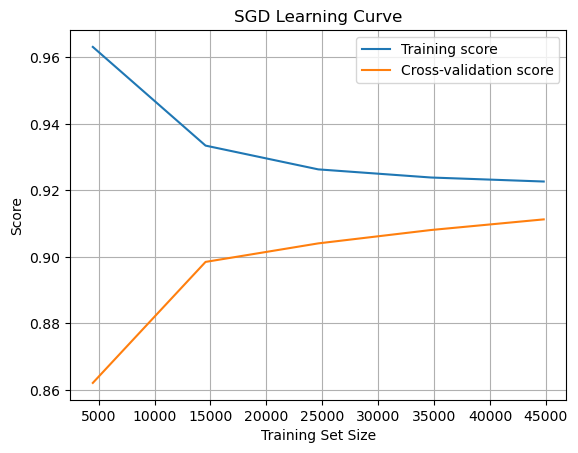

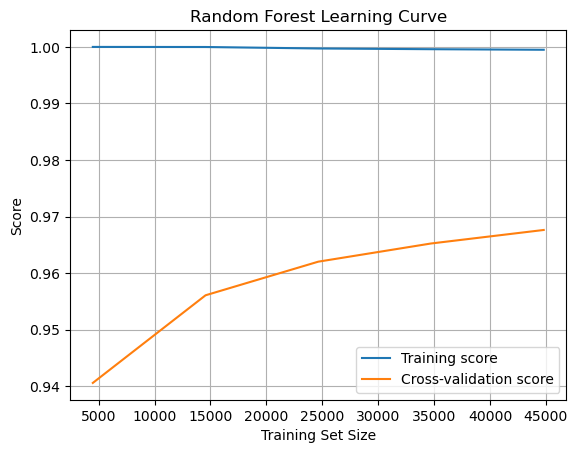

In [27]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

def plot_learning_curve(estimator, title, X, y):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, n_jobs=-1)
    
    train_mean = train_scores.mean(axis=1)
    test_mean = test_scores.mean(axis=1)

    plt.plot(train_sizes, train_mean, label='Training score')
    plt.plot(train_sizes, test_mean, label='Cross-validation score')

    plt.title(title)
    plt.xlabel('Training Set Size')
    plt.ylabel('Score')
    plt.legend()
    plt.grid()
    plt.show()

# Learning curves for KNN, SGD, and Random Forest
plot_learning_curve(knn_clf, "KNN Learning Curve", X_train, y_train)
plot_learning_curve(sgd_clf, "SGD Learning Curve", X_train, y_train)
plot_learning_curve(best_rf_clf, "Random Forest Learning Curve", X_train, y_train)


In [ ]:
#roc curve for all

In [62]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import RocCurveDisplay

# Binarize the output for multiclass ROC
y_test_bin = label_binarize(y_test, classes=np.arange(10))

# Plot ROC curve for KNN
y_score_knn = knn_clf.predict_proba(X_test)
RocCurveDisplay.from_predictions(y_test_bin, y_score_knn)
plt.title("ROC Curve for KNN")
plt.show()

# Plot ROC curve for SGD (Note: SGD may need to output probabilities)
y_score_sgd = sgd_clf.decision_function(X_test)
RocCurveDisplay.from_predictions(y_test_bin, y_score_sgd)
plt.title("ROC Curve for SGD")
plt.show()

# Plot ROC curve for Random Forest
y_score_rf = rf_clf.predict_proba(X_test)
RocCurveDisplay.from_predictions(y_test_bin, y_score_rf)
plt.title("ROC Curve for Random Forest")
plt.show()


ValueError: The target y is not binary. Got multilabel-indicator type of target.

In [21]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)  # == 3530 / (687 + 3530)


0.8370879772350012

In [22]:
recall_score(y_train_5, y_train_pred)  # == 3530 / (1891 + 3530)


0.6511713705958311

In [23]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)


0.7325171197343846

In [ ]:
Precision/Recall Trade-off

In [24]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [25]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [26]:
y_some_digit_pred

array([ True])

In [27]:
threshold = 3000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [28]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")


In [29]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

Saving figure precision_recall_vs_threshold_plot at D:\Msc AI\AIML\lab\4\precision_recall_vs_threshold_plot.png...


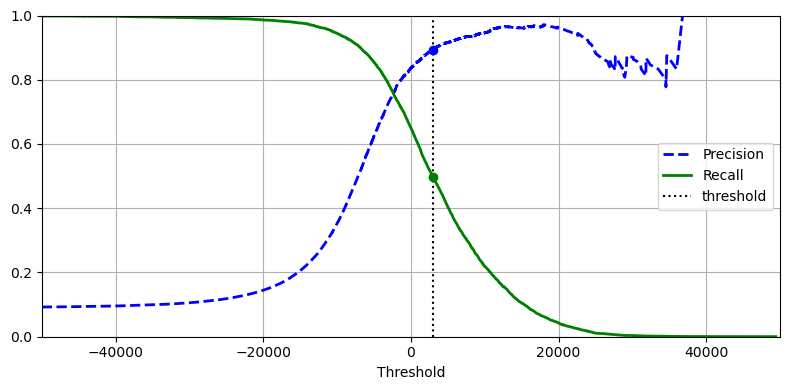

In [30]:
plt.figure(figsize=(8, 4))  # extra code – it's not needed, just formatting
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")

# extra code – this section just beautifies and saves Figure 3–5
idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")
save_fig("precision_recall_vs_threshold_plot")

plt.show()

Saving figure precision_vs_recall_plot at D:\Msc AI\AIML\lab\4\precision_vs_recall_plot.png...


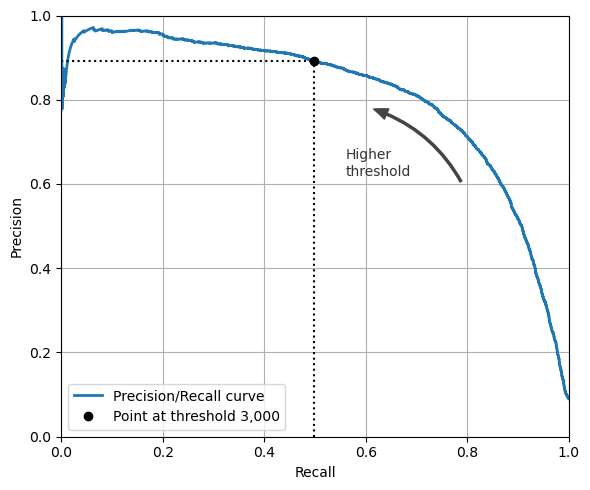

In [31]:
import matplotlib.patches as patches  # extra code – for the curved arrow

plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting

plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")

# extra code – just beautifies and saves Figure 3–6
plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], "k:")
plt.plot([0.0, recalls[idx]], [precisions[idx], precisions[idx]], "k:")
plt.plot([recalls[idx]], [precisions[idx]], "ko",
         label="Point at threshold 3,000")
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.79, 0.60), (0.61, 0.78),
    connectionstyle="arc3,rad=.2",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.56, 0.62, "Higher\nthreshold", color="#333333")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")
save_fig("precision_vs_recall_plot")

plt.show()

In [33]:
idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
print(threshold_for_90_precision)
y_train_pred_90 = (y_scores >= threshold_for_90_precision)
precision_score(y_train_5, y_train_pred_90)
recall_at_90_precision = recall_score(y_train_5, y_train_pred_90)
recall_at_90_precision

3370.019499143955


0.4799852425751706

In [34]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

Saving figure roc_curve_plot at D:\Msc AI\AIML\lab\4\roc_curve_plot.png...


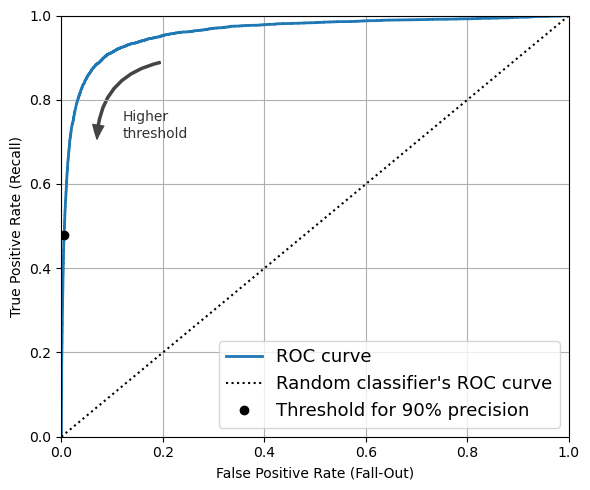

In [35]:
idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")

# extra code – just beautifies and saves Figure 3–7
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.20, 0.89), (0.07, 0.70),
    connectionstyle="arc3,rad=.4",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)
save_fig("roc_curve_plot")

plt.show()
